# HANDLING MISSING VALUES

In [152]:
import pandas as pd
from constants import*
from constants import numeric_columns as num_cols
import numpy as np
import ast

train_df = pd.read_csv("dm1_dataset_2425_imdb/train.csv")

In [153]:
train_df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


## Elenco delle prime trasformazioni di dati (recupero di pezzi di codice dai vecchi notebook)

### Trasformazione \N di genres in NaN

In [154]:
#trasforma valori \N di genres in nan
train_df.loc[train_df["genres"] == r'\N', "genres"] = np.nan

In [155]:
# Count the NaN values in the column
print(train_df["genres"].isna().sum())  

382


### Trasformazione dei generi in liste di stringhe; per i record NaN vengono trasformati in [""]

In [156]:
# Replace NaN values with an empty string
train_df["genres"] = train_df["genres"].fillna("")

# Split genres into lists
train_df["genres"] = train_df["genres"].str.split(',')

# Debug: Check the data types within the lists
print(train_df['genres'].apply(lambda x: [type(genre) for genre in (x if isinstance(x, list) else [])]))

# Preview the updated genres column
print(train_df["genres"].head())


0        [<class 'str'>, <class 'str'>, <class 'str'>]
1                                      [<class 'str'>]
2                                      [<class 'str'>]
3                                      [<class 'str'>]
4        [<class 'str'>, <class 'str'>, <class 'str'>]
                             ...                      
16426                                  [<class 'str'>]
16427    [<class 'str'>, <class 'str'>, <class 'str'>]
16428    [<class 'str'>, <class 'str'>, <class 'str'>]
16429    [<class 'str'>, <class 'str'>, <class 'str'>]
16430                   [<class 'str'>, <class 'str'>]
Name: genres, Length: 16431, dtype: object
0    [Action, Adventure, Animation]
1                          [Action]
2                          [Comedy]
3                      [Reality-TV]
4          [Comedy, Drama, Romance]
Name: genres, dtype: object


In [157]:
train_df["genres"].head()

0    [Action, Adventure, Animation]
1                          [Action]
2                          [Comedy]
3                      [Reality-TV]
4          [Comedy, Drama, Romance]
Name: genres, dtype: object

In [158]:
x = train_df.loc[31, "genres"]
x

['']

### Trasformare i valori \N in nan nelle colonne numeriche

In [159]:
#uniformo assegnando NaN a tutti i valori nulli
for col in num_cols:
    #Converts the values in column col to numeric types (e.g., int, float). 
    # #If a value cannot be converted  (e.g., invalid strings), it is replaced with NaN (missing value).
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')

    #abbiamo trasformato i valori numerici in interi e non float (con Int64 accetta i Nan)
    #train_df[col] = train_df[col].astype('Int64')

In [160]:
#non dà i nan per i generi perchè sono [""]
train_df.isnull().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                             0
dtype: int64

### Ceiling per i rating

In [161]:
#ceiling per rating
train_df['rating'] = train_df['rating'].str.extract(
        r",\s*(\d+)\]"
    ).astype(int)

### CountryOfOrigin in lista di stringhe

In [162]:
#traformazione paesi in liste di stringhe
train_df['countryOfOrigin'] = train_df['countryOfOrigin'].apply(ast.literal_eval)

print(train_df['countryOfOrigin'].apply(lambda x: [type(country) for country in x]))

0        [<class 'str'>]
1        [<class 'str'>]
2        [<class 'str'>]
3        [<class 'str'>]
4        [<class 'str'>]
              ...       
16426    [<class 'str'>]
16427    [<class 'str'>]
16428    [<class 'str'>]
16429    [<class 'str'>]
16430    [<class 'str'>]
Name: countryOfOrigin, Length: 16431, dtype: object


In [163]:
#check the data type
val = train_df.loc[8758,"countryOfOrigin"]
type(val)


list

## MISSING VALUES 1 --> trasformazione awardWins a 0 per i nan

In [164]:
train_df["awardWins"] = train_df["awardWins"].fillna(0)

In [165]:
#controllo
train_df.isnull().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                          0
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                             0
dtype: int64

## MISSING VALUES 2 --> one-hot per generi; i missing hanno 0 in tutte le variabili

In [166]:
# Flatten all lists and get unique genres
all_genres = set(genre for sublist in train_df['genres'] if isinstance(sublist, list) for genre in sublist)
print(all_genres)


{'', 'Documentary', 'History', 'Adventure', 'Thriller', 'Game-Show', 'Comedy', 'Sci-Fi', 'Romance', 'Biography', 'Musical', 'Western', 'Music', 'Film-Noir', 'Adult', 'Reality-TV', 'News', 'Action', 'Crime', 'Short', 'Fantasy', 'Family', 'Mystery', 'Talk-Show', 'Drama', 'Sport', 'War', 'Horror', 'Animation'}


In [167]:
# Create a one-hot encoded column for each genre
for genre in all_genres:
    train_df[f"is_{genre}"] = train_df['genres'].apply(lambda x: 1 if genre in x else 0)


In [168]:
train_df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,is_Short,is_Fantasy,is_Family,is_Mystery,is_Talk-Show,is_Drama,is_Sport,is_War,is_Horror,is_Animation
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,10,1,...,0,0,0,0,0,0,0,0,0,1
1,Looping,6,1982,NaN,NaN,0.0,11,1,10,1,...,0,0,0,0,0,0,0,0,0,0
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,10,1,...,0,0,0,0,0,0,0,0,0,0
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,1,10,22,...,0,0,0,0,0,0,0,0,0,0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,1,10,347,...,0,0,0,0,0,1,0,0,0,0


In [169]:
#droppiamo colonna ["is_"] così che il vettore per i record che non hanno genere siano tutti 0
train_df.drop(["is_"], axis=1, inplace=True)

In [170]:
x = train_df.iloc[31,22:]
x

genres            []
is_Documentary     0
is_History         0
is_Adventure       0
is_Thriller        0
is_Game-Show       0
is_Comedy          0
is_Sci-Fi          0
is_Romance         0
is_Biography       0
is_Musical         0
is_Western         0
is_Music           0
is_Film-Noir       0
is_Adult           0
is_Reality-TV      0
is_News            0
is_Action          0
is_Crime           0
is_Short           0
is_Fantasy         0
is_Family          0
is_Mystery         0
is_Talk-Show       0
is_Drama           0
is_Sport           0
is_War             0
is_Horror          0
is_Animation       0
Name: 31, dtype: object

## MISSING VALUES 3 --> sostituire i nan di runtimeMins come mediana raggruppato per titletype

In [171]:
#creiamo nuova colonna runtimeMinutes dove sostituiamo i nan con mediana 
train_df["fill_runtimeMinutes"] = train_df.groupby(["titleType"])["runtimeMinutes"].transform(lambda x: x.fillna(x.median()))

In [172]:
#controllo; ha senso che runtimeMins abbia ancora quei nan perchè il problema è stato risolto su un'altra colonna nuova creata ad hoc
train_df.isnull().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                          0
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                             0
is_Documentary                     0
is_History                         0
is_Adventure                       0
is_Thriller                        0
i

### Drop della colonna "genres" dato che abbiamo già fatto il one-hot encoding

In [173]:
train_df.drop(["genres"], axis=1, inplace=True)

## heatmap su train con tutte le modifiche uguali a df_pp tranne colonne droppate

<Axes: >

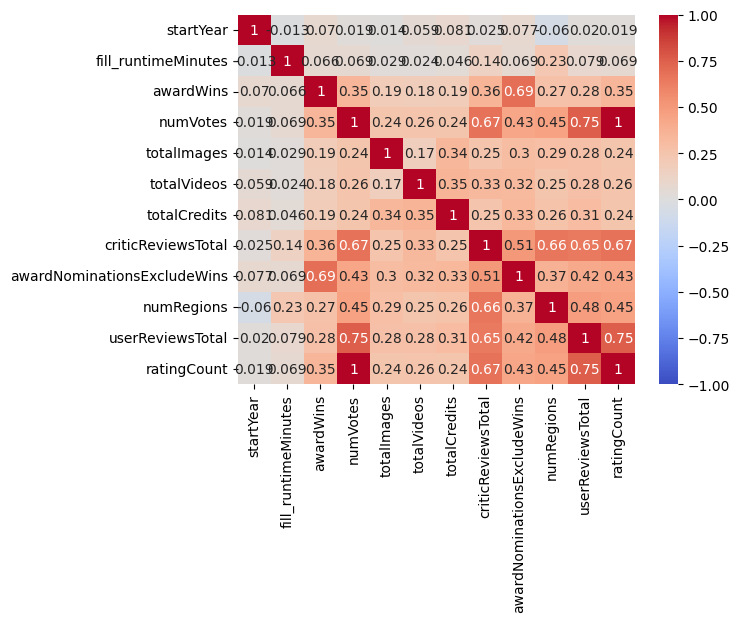

In [174]:
import seaborn as sns
df_corr =  train_df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages','totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal','ratingCount']]
sns.heatmap(df_corr.corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df_corr, figsize=(20,20))
plt.show()

## Drop colonne

In [149]:
train_df.drop(["bestRating"], axis=1, inplace=True)
train_df.drop(["worstRating"], axis=1, inplace=True)
train_df.drop(["isRatable"], axis=1, inplace=True)
train_df.drop(["ratingCount"], axis=1, inplace=True)

### Applicazione delle modifiche in nuovo csv

In [150]:
train_df.to_csv('pp_train.csv', index=False, header=True)